In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
dataset = MNIST(root='data/', download=True)

In [ ]:
#len(dataset)

In [ ]:
#test_dataset = MNIST(root='data/', train = False)

In [ ]:
#len(test_dataset)

In [ ]:
#dataset[0]

In [ ]:
#matplotlib.use('Qt5Agg') 

Label: 5


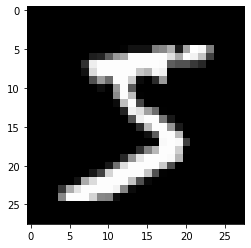

In [4]:
image, label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:', label)

AttributeError: shape

In [6]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [7]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


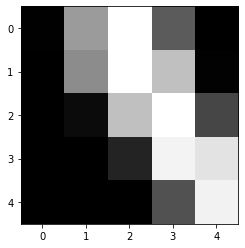

In [12]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [ ]:
#n = 20
#val_pct = 0.2
#n_val = int(val_pct*n)
#idxs = np.random.permutation(n)
#idxs = [1,2,3,4,5]
#print(idxs)
#print(idxs[n_val:])
#print(idxs[:n_val])

In [12]:
def split_indices(n, val_pct):
    n_val = int(val_pct * n)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [13]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [14]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [16]:
print(train_sampler.indices)

[13800 26601  5708 ...  5193  4442 47714]


In [26]:

#model = nn.Linear(input_size, num_classes)

In [ ]:
#print(model.weight.shape)

In [29]:
class MnistModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
        

In [32]:
input_size = 28 * 28
num_classes = 10
model = MnistModel(input_size, num_classes)


In [ ]:
#print(model.linear.weight.shape, model.linear.bias.shape)
#list(model.parameters())
#print(model.forward(images))

In [35]:
for images, labels in train_loader:
    outputs = model(images)
    break
print('outputs.shape :', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

outputs.shape : torch.Size([100, 10])
Sample outputs : 
 tensor([[ 0.2722,  0.0340, -0.2804, -0.0668, -0.0067,  0.1101,  0.1462,  0.0598,
          0.0985, -0.1706],
        [-0.0169,  0.0514, -0.1374,  0.1919,  0.0411,  0.2260,  0.2760,  0.0039,
          0.0208, -0.3182]])


In [36]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities: \n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.1273, 0.1003, 0.0733, 0.0907, 0.0963, 0.1082, 0.1122, 0.1029, 0.1070,
         0.0817],
        [0.0938, 0.1004, 0.0831, 0.1156, 0.0994, 0.1196, 0.1257, 0.0957, 0.0974,
         0.0694]])
Sum:  1.0


In [52]:
max_preds, preds = torch.max(probs, dim=1)
preds
#max_preds

tensor([0.1273, 0.1257, 0.1177, 0.1268, 0.1439, 0.1424, 0.1353, 0.1341, 0.1493,
        0.1318, 0.1271, 0.1255, 0.1200, 0.1317, 0.1308, 0.1244, 0.1144, 0.1520,
        0.1295, 0.1223, 0.1219, 0.1172, 0.1253, 0.1439, 0.1387, 0.1693, 0.1159,
        0.1300, 0.1312, 0.1351, 0.1667, 0.1613, 0.1160, 0.1492, 0.1356, 0.1409,
        0.1172, 0.1272, 0.1231, 0.1527, 0.1326, 0.1114, 0.1493, 0.1229, 0.1214,
        0.1299, 0.1518, 0.1519, 0.1474, 0.1448, 0.1482, 0.1492, 0.1181, 0.1240,
        0.1277, 0.1665, 0.1588, 0.1278, 0.1136, 0.1349, 0.1449, 0.1830, 0.1387,
        0.1406, 0.1439, 0.1357, 0.1551, 0.1235, 0.1209, 0.1502, 0.1301, 0.1300,
        0.1286, 0.1356, 0.1380, 0.1518, 0.1436, 0.1331, 0.1293, 0.1345, 0.1115,
        0.1277, 0.1149, 0.1292, 0.1361, 0.1265, 0.1450, 0.1338, 0.1193, 0.1243,
        0.1240, 0.1247, 0.1226, 0.1532, 0.1163, 0.1103, 0.1340, 0.1347, 0.1450,
        0.1276], grad_fn=<MaxBackward0>)

In [38]:
labels

tensor([9, 5, 7, 1, 2, 7, 9, 8, 7, 6, 2, 5, 9, 8, 5, 5, 8, 9, 1, 7, 3, 3, 7, 9,
        3, 0, 1, 6, 3, 6, 7, 3, 1, 8, 4, 3, 7, 0, 4, 0, 9, 1, 0, 5, 1, 2, 6, 3,
        0, 7, 3, 7, 8, 1, 8, 7, 6, 7, 8, 5, 3, 9, 9, 2, 0, 8, 9, 6, 6, 2, 1, 0,
        9, 9, 2, 2, 3, 0, 6, 2, 1, 2, 7, 3, 8, 9, 9, 8, 0, 8, 6, 3, 2, 5, 2, 1,
        4, 3, 8, 5])

In [47]:
#def accuracy(l1,l2):
  #  return torch.sum(l1==l2).item()/len(l1)

In [40]:
accuracy(labels,preds)

0.12

In [41]:
loss_fn = F.cross_entropy

In [42]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3492, grad_fn=<NllLossBackward0>)


In [43]:
learning_rate = 0.001
optimzer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [44]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric = None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
        
    return loss.item(), len(xb), metric_result

In [45]:
def evaluate(model, loss_fn, valid_dl, metric = None):
    with torch.no_grad():
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb,yb in valid_dl]
        
        losses, nums, metrics = zip(*results)
        
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    
    return avg_loss, total, avg_metric

In [80]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    print('Comparison : {}'.format(torch.sum(preds==labels).item()))
    print('Total Preds : {}'.format(len(preds)))
    return torch.sum(preds==labels).item()/len(preds)

In [83]:
accuracy(outputs,labels)

Comparison : 12
Total Preds : 100


0.12

In [55]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Total: {},Loss : {:4f}, Accuracy: {:.4f}'.format(total,val_loss, val_acc))

Total: 12000,Loss : 2.330846, Accuracy: 0.1267


In [60]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
    for epoch in range(epochs):
        for xb,yb in train_dl:
            loss, _,_ = loss_batch(model, loss_fn, xb,yb, opt)
    
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result
    
    if metric is None:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
    else:
        print('Epoch [{}/{}], Loss: {:.4f},{}:{:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__,val_metric))

In [61]:
input_size = 28 * 28
num_classes = 10
learning_rate = 0.0001
model = MnistModel(input_size, num_classes)
optimzer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [62]:
fit(5, model, F.cross_entropy, optimzer, train_loader, val_loader, accuracy)

Epoch [5/5], Loss: 2.0781,accuracy:0.4571


In [63]:
fit(, model, F.cross_entropy, optimzer, train_loader, val_loader, accuracy)

Epoch [5/5], Loss: 1.8812,accuracy:0.6817
